In [228]:
import json
from collections import defaultdict
import pandas as pd

def get_response(fname):
    with open(fname, 'r') as f:
        data = f.read()

    response = json.loads(data)

    surv_resp = defaultdict(dict)
    pass_resp = defaultdict(str)
    time_resp = defaultdict(str)

    for k, v in response.items():
        if 'response' in k:
            temp = k.split("_")
            pid = temp[0].strip('p')
            v = json.loads(v)
            surv_resp[pid].update(v)
        elif 'time' in k:
            temp = k.split("_")
            pid = temp[0]
            time_resp[pid] = float(v)
        elif 'password' in k:
            pass_resp[k] = v

    return (pass_resp, time_resp, surv_resp)

In [229]:
page_map = {
    '0': 'startstudy',
    '1': 'fpass',
    '2': 'fcog',
    '3': 'fpasssurvey',
    '4': 'fpassrecall',
    '5': 'pagegif',
    '6': 'desinint',
    '7': 'quest',
    '8': 'csquest',
    '9': 'motivation',
    '10': 'spass',
    '11': 'scog',
    '12': 'spasssurvey',
    '13': 'spassrecall',
    '14': 'demo',
    '15': 'thanks',
}

In [230]:
cat_map = {
    'Perspicuity': [1, 2, 3, 4],
    'Aesthetics': [5, 7, 8, 9],
    'Usefulness': [10, 11, 12, 13],
    'Clarity': [14, 15, 16, 17],
    'Creative': [28],
    'Engaging': [6, 15, 29]
    # 'Novel': [],
    # 'Attractive': [],
    # 'Easy to understand': [],
    # 'Informative': [],
    # 'Well Organized ': [],
    # 'To the Point': []

}

In [231]:
questions = {}
for page_id in [3, 7, 8, 12, 14]:
    page_name = page_map.get(str(page_id))
    question_file = f'{page_name}.json'

    with open(f'questions/{question_file}', 'r') as f:
        questions[str(page_id)] = json.loads(f.read())

def get_qdetails(pid, qsid):
    pid = str(pid)
    qid, sid = qsid.split('-')
    if not questions.get(pid): return "Page ID not found."
    ret_text = ""
    for question in questions.get(pid):
        if question.get('qid') == int(qid):
            ret_text += question.get('text')
            for subquestion in question.get('subquestions'):
                if subquestion.get('sid') == int(sid):
                    ret_text += '\n' + str(subquestion)
    return ret_text

In [232]:
import os
fpath = './responses'
password_response = []
time_response = []
survey_response = []
for i, fname in enumerate(os.listdir(fpath)):
    if fname.endswith('.json'):
        pss, tim, sur = get_response(os.path.join(fpath, fname))
        password_response.append(pss)
        time_response.append(tim)
        survey_response.append(sur)

In [233]:
import pandas as pd
password_response_df = pd.DataFrame(password_response)
password_response_df.sort_index(axis=1)

,password1,password2,password2_recall1,password2_recall2,password2_recall3
0,mathew1555,lloydo7118,lloyod7118,lloyd7118,lloyd7118
1,90pOty2*,BiDbm8r4*2,NaN,NaN,NaN
2,p0tato123,P0taten123!,NaN,NaN,NaN
3,passingclouds,passingclouds,NaN,NaN,NaN
4,kobatohasegawa,KobatoHasegawa924,NaN,NaN,NaN
5,dAshiNg432,432dAshiNg432,NaN,NaN,NaN
6,Raymond@1990,Raymond@1990,NaN,NaN,NaN
7,Celesdilla@97,McxyZcbA&1Gb,NaN,NaN,NaN
8,kaylenbabyslims,kaylenbabyslims,NaN,NaN,NaN
9,S1ster87!,S1ster87!,NaN,NaN,NaN


In [234]:
page_time_df = pd.DataFrame(time_response)
page_time_df = page_time_df.sort_index(axis=1, key=lambda x: x.astype(int))
page_time_df = page_time_df.rename(page_map, axis=1)
page_time_df['total (mins)'] = page_time_df.sum(axis=1)/60
page_time_df

,startstudy,fpass,fcog,fpasssurvey,fpassrecall,pagegif,desinint,quest,csquest,motivation,spass,scog,spasssurvey,spassrecall,demo,total (mins)
0,5.654,121.542,130.037,41.975,18.613,14.556,24.998,124.926,303.462,6.516,176.012,112.844,35.564,75.685,66.124,20.975133
1,5.359,96.034,29.412,36.208,18.100,20.903,25.112,62.661,321.775,10.203,92.111,26.370,32.442,15.356,52.825,14.081183
2,7.372,33.481,40.460,20.261,10.223,8.759,27.234,55.492,261.447,14.435,34.680,14.859,18.228,11.479,57.530,10.265667
3,6.683,37.997,147.867,25.163,19.355,7.762,39.162,82.507,107.635,10.547,24.772,12.170,22.364,16.717,49.516,10.170283
4,6.767,36.306,18.475,35.864,12.387,11.668,39.026,47.042,159.683,14.717,24.169,14.297,23.643,11.720,55.534,8.521633
5,4.686,88.343,30.275,24.176,16.795,21.869,40.881,67.452,140.099,23.156,31.384,27.152,38.008,24.461,35.890,10.243783
6,7.155,93.650,50.066,30.817,20.598,131.669,49.674,152.366,153.775,16.593,170.260,10.416,29.986,19.285,65.755,16.701083
7,9.069,84.863,26.035,37.928,25.914,23.160,49.338,95.998,255.007,23.536,144.160,9.198,42.687,34.126,83.038,15.734283
8,8.536,41.809,40.132,30.751,17.105,12.245,27.786,73.747,165.986,9.428,16.807,30.120,34.311,13.888,64.482,9.785550
9,9.166,88.013,51.610,26.139,15.121,9.491,25.885,69.568,181.378,14.824,21.096,27.438,39.304,10.294,50.487,10.663567


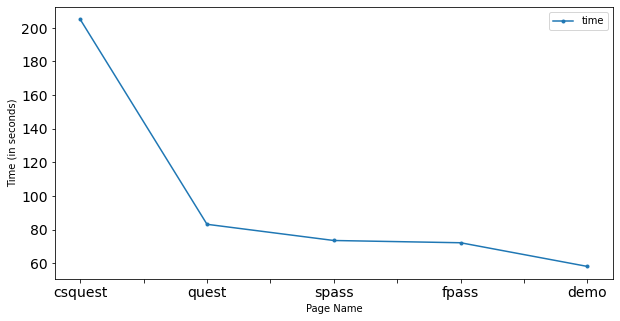

In [235]:
# top 5 pages with higher time
top5 = pd.DataFrame(columns=['page', 'time'])
for i, data in page_time_df.mean().sort_values(ascending=False).head(5).items():
    top5 = top5.append(pd.DataFrame([[i, data]], columns=top5.columns), ignore_index=True)

_ = top5.plot(x='page', y='time', figsize=(10, 5), xlabel="Page Name", ylabel="Time (in seconds)", fontsize=14, style=".-")

In [236]:
survey_response_df = pd.DataFrame(survey_response)
survey_response_df

,8,7,14,12,3
0,"{'5-1': '5', '6-1': '1', '7-1': '5', '8-1': ['...","{'1-16': '3', '1-15': '5', '1-12': '5', '1-14'...","{'1-1': 'Man', '2-1': '50-54 years old', '3-1'...","{'1-1': '6', '2-1': '5', '3-1': '6', '3-2': '4...","{'1-1': '4', '2-1': '5', '2-2': '6', '2-3': '5..."
1,"{'5-1': '5', '6-1': '1', '7-1': '6', '8-1': ['...","{'1-15': '6', '1-16': '6', '1-17': '7', '1-11'...","{'1-1': 'Man', '2-1': '25-29 years old', '3-1'...","{'1-1': '6', '2-1': '6', '3-1': '7', '3-2': '2...","{'1-1': '5', '2-1': '6', '2-2': '7', '2-3': '5..."
2,"{'5-1': '3', '6-1': '1', '7-1': '6', '8-1': ['...","{'1-14': '7', '1-13': '5', '1-16': '6', '1-15'...","{'1-1': 'Man', '2-1': '30-34 years old', '3-1'...","{'1-1': '7', '2-1': '7', '3-1': '5', '3-2': '1...","{'1-1': '5', '2-1': '7', '2-2': '2', '2-3': '2..."
3,"{'5-1': '7', '6-1': '1', '7-1': '5', '8-1': ['...","{'1-12': '4', '1-13': '5', '1-15': '4', '1-16'...","{'1-1': 'Man', '2-1': '18-24 years old', '3-1'...","{'1-1': '6', '2-1': '5', '3-1': '3', '3-2': '2...","{'1-1': '6', '2-1': '5', '2-2': '6', '2-3': '5..."
4,"{'5-1': '4', '6-1': '1', '7-1': '7', '8-1': ['...","{'1-17': '7', '1-11': '7', '1-14': '7', '1-15'...","{'1-1': 'Man', '2-1': '25-29 years old', '3-1'...","{'1-1': '6', '2-1': '6', '3-1': '1', '3-2': '1...","{'1-1': '5', '2-1': '6', '2-2': '3', '2-3': '2..."
5,"{'5-1': '6', '6-1': '1', '7-1': '6', '8-1': ['...","{'1-14': '6', '1-16': '6', '1-12': '6', '1-17'...","{'1-1': 'Woman', '2-1': '35-39 years old', '3-...","{'1-1': '4', '2-1': '6', '3-1': '2', '3-2': '4...","{'1-1': '2', '2-1': '7', '2-2': '7', '2-3': '6..."
6,"{'5-1': '7', '6-1': '1', '7-1': '7', '8-1': ['...","{'1-13': '7', '1-16': '7', '1-11': '7', '1-14'...","{'1-1': 'Man', '2-1': '30-34 years old', '3-1'...","{'1-1': '7', '2-1': '7', '3-1': '4', '3-2': '2...","{'1-1': '7', '2-1': '7', '2-2': '7', '2-3': '7..."
7,"{'6-1': '1', '8-1': ['Social Media', 'Email', ...","{'1-11': '7', '1-13': '5', '1-12': '7', '1-14'...","{'1-1': 'Woman', '2-1': '25-29 years old', '3-...","{'1-1': '7', '2-1': '7', '3-1': '6', '3-2': '1...","{'1-1': '7', '2-1': '7', '2-2': '7', '2-3': '7..."
8,"{'1-2': '5', '1-4': '1', '1-5': '7', '1-7': '6...","{'1-1': '7', '1-6': '7', '1-10': '6', '1-8': '...","{'1-1': 'Woman', '2-1': '40-44 years old', '3-...","{'1-1': '5', '2-1': '1', '3-1': '1', '3-2': '1...","{'1-1': '5', '2-1': '7', '2-2': '5', '2-3': '3..."
9,"{'1-5': '5', '1-3': '3', '1-7': '5', '1-1': '4...","{'1-4': '5', '1-1': '5', '1-10': '5', '1-8': '...","{'1-1': 'Man', '2-1': '55-59 years old', '3-1'...","{'1-1': '5', '2-1': '4', '3-1': '6', '3-2': '3...","{'1-1': '5', '2-1': '2', '2-2': '6', '2-3': '6..."


### Attention Check

In [237]:
attention = {
   '7': {
      '1-6' : 7
   },
   '8': {
      '2-1' : 6,
      '6-1' : 1
   }
}

In [238]:
for pid, sub in attention.items():
    for qsid, val in sub.items():
        print(get_qdetails(pid, qsid))


{'sid': 6, 'type': 'likert', 'title': '', 'elements': {'low': 'select rightmost circle', 'high': 'select rightmost circle'}}
Please select the sixth option which tells us you are paying attention.
{'sid': 1, 'type': 'likert', 'title': 'sixth option', 'elements': {'low': 'Option One', 'high': 'Option Seven'}}
Please select the first option which tells us you are paying attention.
{'sid': 1, 'type': 'likert', 'title': 'first option', 'elements': {'low': 'Option One', 'high': 'Option Seven'}}


In [239]:
attentive_participants = defaultdict(lambda: True)
for pid, sub in attention.items():
    # print(pid)
    for qsid, e in sub.items():
        # print(qsid)
        for pn, a in enumerate(survey_response_df[pid].apply(lambda x: x.get(qsid))):
            # print(pn, e, a, str(e)==str(a))
            attentive_participants[str(pn)] = attentive_participants[str(pn)] and (str(e)==str(a))

print(attentive_participants)

defaultdict(<function <lambda> at 0x7f9df9075790>, {'0': False, '1': True, '2': True, '3': True, '4': True, '5': True, '6': True, '7': True, '8': True, '9': True})


In [240]:
attentive = pd.DataFrame(attentive_participants, index=[0]).transpose()
attentive.columns = ['attentive']
attentive

,attentive
0,False
1,True
2,True
3,True
4,True
5,True
6,True
7,True
8,True
9,True


### First Password Survey Analysis

In [241]:
# fpass survey analysis
fpasssurveyQ_df = pd.DataFrame(questions.get('3'))
fpasssurveyQ_df

,qid,text,subquestions
0,1,The password I have created is:,"[{'sid': 1, 'type': 'likert', 'title': 'first ..."
1,2,Please answer the following questions based on...,"[{'sid': 1, 'type': 'likert', 'title': 'I do n..."


In [242]:
# fpasssurvey
pd.DataFrame(survey_response_df['3'].to_dict())

,0,1,2,3,4,5,6,7,8,9
1-1,4,5,5,6,5,2,7,7,5,5
2-1,5,6,7,5,6,7,7,7,7,2
2-2,6,7,2,6,3,7,7,7,5,6
2-3,5,5,2,5,2,6,7,7,3,6
2-4,1,1,7,5,7,2,2,6,7,2


In [243]:
# fpasssurvey
normqsid = []
import json
fpass = pd.DataFrame(survey_response_df['3'].to_dict()).astype(int)
normfpass = 8 - fpass.loc[normqsid]
fpass.update(normfpass)
fpass

new_index = {}
for qsid in fpass.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('3', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
fpass = fpass.rename(new_index)
fpass['median'] = fpass.median(axis=1)
fpass

,0,1,2,3,4,5,6,7,8,9,median
first password strength,4,5,5,6,5,2,7,7,5,5,5.0
"I do not change my passwords, unless I have to.",5,6,7,5,6,7,7,7,7,2,6.5
I use different passwords for different online accounts that I have.,6,7,2,6,3,7,7,7,5,6,6.0
"When I create a new online account, I try to use a password that goes beyond the site’s minimum requirements.",5,5,2,5,2,6,7,7,3,6,5.0
I do not include special characters in my password if it’s not required.,1,1,7,5,7,2,2,6,7,2,3.5


In [244]:
get_qdetails('3', '1-1')

"The password I have created is: \n{'sid': 1, 'type': 'likert', 'title': 'first password strength', 'elements': {'low': 'Weak', 'high': 'Strong'}}"

In [245]:
get_qdetails('7', '1-1')

"\n{'sid': 1, 'type': 'likert', 'title': '', 'elements': {'low': 'not understandable', 'high': 'understandable'}}"

### Quest Analysis

In [246]:
quest = pd.DataFrame(survey_response_df['7'].to_dict()).astype(int)
quest['mean'] = quest.mean(axis=1)
quest

,0,1,2,3,4,5,6,7,8,9,mean
1-16,3,6,6,5,7,6,7,6,7,5,5.8
1-15,5,6,6,4,7,6,7,7,7,5,6.0
1-12,5,6,7,4,7,6,6,7,7,5,6.0
1-14,4,6,7,5,7,6,6,7,6,4,5.8
1-11,6,6,7,4,7,6,7,7,7,5,6.2
1-13,3,4,5,5,7,4,7,5,6,4,5.0
1-17,5,7,6,5,7,6,7,7,6,4,6.0
1-9,5,2,2,3,5,2,7,6,4,4,4.0
1-2,5,7,7,4,7,7,7,7,7,4,6.2
1-10,4,7,6,4,7,6,7,7,6,5,5.9


In [247]:
# quest
normqsid = ['1-4']
import json
quest = pd.DataFrame(survey_response_df['7'].to_dict()).astype(int)
normquest = 8 - quest.loc[normqsid]
quest.update(normquest)

new_index = {}
for qsid in quest.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('7', qsid).replace("'", '"')).get('elements').get(likert_scale)
new_index
quest = quest.rename(new_index)
quest['mean'] = quest.mean(axis=1)
quest

,0,1,2,3,4,5,6,7,8,9,mean
ordered,3.0,6.0,6.0,5.0,7.0,6.0,7.0,6.0,7.0,5.0,5.8
structured,5.0,6.0,6.0,4.0,7.0,6.0,7.0,7.0,7.0,5.0,6.0
beneficial,5.0,6.0,7.0,4.0,7.0,6.0,6.0,7.0,7.0,5.0,6.0
well grouped,4.0,6.0,7.0,5.0,7.0,6.0,6.0,7.0,6.0,4.0,5.8
helpful,6.0,6.0,7.0,4.0,7.0,6.0,7.0,7.0,7.0,5.0,6.2
rewarding,3.0,4.0,5.0,5.0,7.0,4.0,7.0,5.0,6.0,4.0,5.0
organized,5.0,7.0,6.0,5.0,7.0,6.0,7.0,7.0,6.0,4.0,6.0
pleasant,5.0,2.0,2.0,3.0,5.0,2.0,7.0,6.0,4.0,4.0,4.0
easy to learn,5.0,7.0,7.0,4.0,7.0,7.0,7.0,7.0,7.0,4.0,6.2
useful,4.0,7.0,6.0,4.0,7.0,6.0,7.0,7.0,6.0,5.0,5.9


In [248]:
pd.DataFrame(survey_response_df['8'].to_dict())

,0,1,2,3,4,5,6,7,8,9
5-1,5,5,3,7,4,6,7,NaN,1,4
6-1,1,1,1,1,1,1,1,1,1,1
7-1,5,6,6,5,7,6,7,NaN,1,5
8-1,"[Social Media, Email, E-commerce Websites, Gov...","[Social Media, Email, Financial Websites, Gami...","[Email, Financial Websites, E-commerce Website...","[Social Media, Email, Gaming Websites]","[Social Media, Email, Financial Websites, Cour...",[None of the above],"[Social Media, Email, Course Management Websit...","[Social Media, Email, Financial Websites, E-co...",[Gaming Websites],"[Social Media, Course Management Websites, e.g..."
2-1,6,6,6,6,6,6,6,6,6,6
3-1,5,5,6,6,1,3,7,1,3,3
3-2,6,6,7,7,7,6,7,7,2,5
3-3,4,2,5,7,5,4,6,6,1,2
3-4,5,4,5,6,5,4,7,6,1,2
4-1,5,7,7,5,7,7,7,7,7,3


In [249]:
# csquest
# qualindex = ['8-1', '10-1', '11-1']

qualindex = ['8-1', '10-1']

csquest = pd.DataFrame(survey_response_df['8'].to_dict())
csquestqual = csquest.loc[qualindex]
display(csquestqual)

,0,1,2,3,4,5,6,7,8,9
8-1,"[Social Media, Email, E-commerce Websites, Gov...","[Social Media, Email, Financial Websites, Gami...","[Email, Financial Websites, E-commerce Website...","[Social Media, Email, Gaming Websites]","[Social Media, Email, Financial Websites, Cour...",[None of the above],"[Social Media, Email, Course Management Websit...","[Social Media, Email, Financial Websites, E-co...",[Gaming Websites],"[Social Media, Course Management Websites, e.g..."
10-1,the fear of getting hacked,The part that motivates me most to create a st...,The man being regretful that he didn't make a ...,Social media,It illustrates the reason for using a complex ...,Seeing that getting hacked can affect others a...,The hacking part,"The second part ""why it happened?"".",I guess in the third image where the hacker sa...,That the user was hacked and showing that the ...


In [250]:
normqsid = []

csquestquant = csquest.drop(qualindex).fillna(0).astype(int)
csquestquant.drop(attention.get('8'), inplace=True)
normcsquestquant = 8 - csquestquant.loc[normqsid]
csquestquant.update(normquest)

new_index = {}
for qsid in csquestquant.index:
    new_index[qsid] = json.loads(get_qdetails('8', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
csquestquant = csquestquant.rename(new_index)
csquestquant['mean'] = csquestquant.median(axis=1)
csquestquant

,0,1,2,3,4,5,6,7,8,9,mean
portrayal of hacker stimulates,5.0,5.0,3.0,7.0,4.0,6.0,7.0,0.0,1.0,4.0,4.5
portrayal of victim encourages,5.0,6.0,6.0,5.0,7.0,6.0,7.0,0.0,1.0,5.0,5.5
Makes me worried,5.0,5.0,6.0,6.0,1.0,3.0,7.0,1.0,3.0,3.0,4.0
Encourages me to create a strong password,6.0,6.0,7.0,7.0,7.0,6.0,7.0,7.0,2.0,5.0,6.5
Makes me feel emotionally connected to the presented scenario,4.0,2.0,5.0,7.0,5.0,4.0,6.0,6.0,1.0,2.0,4.5
Makes me feel personally connected to the presented scenario,5.0,4.0,5.0,6.0,5.0,4.0,7.0,6.0,1.0,2.0,5.0
ease to follow,5.0,7.0,7.0,5.0,7.0,7.0,7.0,7.0,7.0,3.0,7.0
Creative,6.0,3.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,4.0,5.5
Well Organized,5.0,6.0,6.0,2.0,7.0,6.0,7.0,7.0,6.0,5.0,6.0
Informative,6.0,6.0,7.0,5.0,7.0,7.0,7.0,7.0,7.0,6.0,7.0


In [251]:
#spasssurvey
pd.DataFrame(survey_response_df['12'].to_dict())

,0,1,2,3,4,5,6,7,8,9
1-1,6,6,7,6,6,4,7,7,5,5
2-1,5,6,7,5,6,6,7,7,1,4
3-1,6,7,5,3,1,2,4,6,1,6
3-2,4,2,1,2,1,4,2,1,1,3
3-3,2,2,1,2,1,1,1,1,5,1
3-4,5,4,7,5,6,1,6,7,1,2
4-1,1,2,2,2,2,2,2,2,2,2


In [252]:
# spasssurvey
normqsid = []
import json
spass = pd.DataFrame(survey_response_df['12'].to_dict()).astype(int)
normspass = 8 - spass.loc[normqsid]
spass.update(normspass)
spass

new_index = {}
for qsid in spass.index:
    # likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('12', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
spass = spass.rename(new_index)
spass['median'] = spass.median(axis=1)
spass

,0,1,2,3,4,5,6,7,8,9,median
second password strength,6,6,7,6,6,4,7,7,5,5,6.0
motivated after seeing design,5,6,7,5,6,6,7,7,1,4,6.0
hard to remember,6,7,5,3,1,2,4,6,1,6,4.5
can be easily guessed by a hacker,4,2,1,2,1,4,2,1,1,3,2.0
can be easily guessed by my close friends or family members,2,2,1,2,1,1,1,1,5,1,1.0
stronger than the passwords I usually use,5,4,7,5,6,1,6,7,1,2,5.0
second option,1,2,2,2,2,2,2,2,2,2,2.0


In [253]:
# demo
pd.DataFrame(survey_response_df['14'].to_dict())

,0,1,2,3,4,5,6,7,8,9
1-1,Man,Man,Man,Man,Man,Woman,Man,Woman,Woman,Man
2-1,50-54 years old,25-29 years old,30-34 years old,18-24 years old,25-29 years old,35-39 years old,30-34 years old,25-29 years old,40-44 years old,55-59 years old
3-1,[White],[White],[White],[White],[White],[White],[White],[Hispanic or Latino],[White],[White]
4-1,Four-year College Degree,High School Graduate,High School Graduate,Four-year College Degree,High School Graduate,Graduate degree (MS/Doctorate),Four-year College Degree,Four-year College Degree,Less than High School,Four-year College Degree
5-1,Business,"Computer Science/Engineering, and Information ...",Education,Business,"Computer Science/Engineering, and Information ...",I prefer not to answer,"Computer Science/Engineering, and Information ...","Computer Science/Engineering, and Information ...",homemaker,Other areas of Engineering
6-1,Business or industry,I prefer not to answer,Non-profit organization,Business or industry,Student,I prefer not to answer,Business or industry,Business or industry,homemaker,Business or industry
7-1,Hold or held a work position,Self-taught,No experience,Pursuing or completed a degree,Pursuing or completed a degree,I prefer not to answer,Pursuing or completed a degree,Hold or held a work position,Self-taught,Self-taught
8-1,Pursuing or completed a degree,Self-taught,No experience,No experience,No experience,I prefer not to answer,Self-taught,Formal training,No experience,Self-taught
